In [132]:
import pandas as pd
import scipy.stats as st
import seaborn as sns
from scipy import stats
import random

dataAnggur = pd.read_csv('../data/anggur.csv')

Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot

## Asumsi
Pada tes normalitas yang dilakukan pada Tugas Besar II ini, berlaku asumsi sebagai berikut:
- Suatu distibusi dapat dikatakan *positively skewed* apabila memiliki nilai *skewness* lebih besar dari 0.5
- Suatu distibusi dapat dikatakan *negatively skewed* apabila memiliki nilai *skewness* lebih besar dari -0.5
- Suatu distibusi dapat dikatakan simetris apabila memiliki nilai *skewness* diantara -0.5 sampai 0.5
- Jika nilai modus = median = mean maka nilai *skewness* adalah nol
- Jika nilai modus < median < mean maka distribusi dapat dikatakan *positively skewed* 
- Jika nilai modus > median > mean maka distribusi dapat dikatakan *negatively skewed* 

## Metode Pengetesan Normalitas
Secara umum, pengetesan normalitas dibagi menjadi dua cara, yaitu sebagai berikut.
- Pengetesan melalui grafik. Pengetesan dilakukan dengan membandingkan grafik (histogram, QQ plot, dll.) dengan grafik yang bersesuaian dari sampel data yang berdistribusi normal. Pendekatan ini bersifat informal.
- Pengetesan statistik. Pengetesan ini dilakukan dengan uji hipotesis. Contoh pengetesan normalitas secara statistik adalah Shapiro-Wilk test, Kolmogorov-Smirnov test, dan Jarque-Bera test. Pengetesan ini bersifat formal.
<br>

Pada bagian ini, pengetesan normalitas yang digunakan yaitu pengetesan melalui histogram, yang akan dikaitkan dengan statistik-statistik tertentu seperti *skewness*, *excess kurtosis*, mean, median, dan modus. Lalu, hasil pengetesan tersebut dibandingkan dengan hasil pengetesan normalitas statistik, yaitu D'Agostino-Pearson Test dan Shapiro-Wilk Test.
<br><br>
Berikut adalah penjelasan mengenai pengetesan yang digunakan.

### 1. Pengetesan melalui Histogram
Secara teoretis, data yang berdistribusi normal memiliki histogram dengan ciri sebagai berikut.
- Histogram berbentuk bell-shaped yang simetris.
- Histogram berbentuk simetris terhadap sumbu tegak x = mean.
- Kurva mendekati sumbu datar secara asimtotik ke kiri dan kanan.
- Skewness bernilai 0, yang menandakan distribusi simetris.
- Kurtosis bernilai 3 (excess kurtosis bernilai 0).
<br>

Pada pengetesan yang dilakukan, histogram setiap kolom divisualisasikan dan dibandingkan dengan ciri histogram di atas. Namun, untuk perhitungan skewness dan kurtosis, diberikan toleransi sebesar 0.5, seperti asumsi yang dituliskan di atas. 

### 2. D'Agostino-Pearson Test
D'Agostino-Pearson Test adalah tes normalitas yang perhitungannya menggabungkan hasil tes skewness dan kurtosis D'Agostino. Tes ini kurang sensitif terhadap penyimpangan (deviasi) dari distribusi normal di ekor distribusi.
$$
K^2 = Z_s^2 + Z_k^2
$$
$Z_s^2$ adalah z-score dari tes skewness D'Agostino dan $Z_k^2$ adalah z-score dari tes kurtosis D'Agostino. Jika hipotesis null terbukti, $K^2$ diaproksimasi terdistribusi chi-squared dengan derajat kebebasan 2.
<br><br>
Berikut adalah mekanisme pengujian hipotesis pada D'Agostino-Pearson Test.
- $H_0$\
Data berdistribusi normal.
- $H_1$\
Data tidak berdistribusi normal.
- Tingkat Signifikansi\
$\alpha = 0.05$
- Penarikan Kesimpulan dengan Tes Signifikansi\
Jika $p > \alpha$, maka $H_0$ *fail to reject*, artinya data berdistribusi normal. Sebaliknya, jika $p \le \alpha, maka $H_0$ *rejected*, artinya data tidak berdistribusi normal.

### 3. Shapiro-Wilk Test
Shapiro-Wilk Test adalah tes normalitas yang perhitungannya didasari oleh perbandingan antara data yang diobservasi dan *expected normal distribution* dari data tersebut. Tes ini tidak terlalu *reliable* untuk jumlah sampel yang kecil. Namun, sampel yang ada pada tiap kolom sudah cukup besar, yaitu sebanyak 1000 sampel.<br><br>
Berikut adalah mekanisme pengujian hipotesis pada Shapiro-Wilk Test.
- $H_0$\
Data berdistribusi normal.
- $H_1$\
Data tidak berdistribusi normal.
- Tingkat Signifikansi\
$\alpha = 0.05$
- Penarikan Kesimpulan dengan Tes Signifikansi\
Jika $p > \alpha$, maka $H_0$ *fail to reject*, artinya data berdistribusi normal. Sebaliknya, jika $p \le \alpha, maka $H_0$ *rejected*, artinya data tidak berdistribusi normal.

### Fungsi Wrapper Normality Test

In [133]:
def normalityTests(colName):
    colors = ['red', 'blue', 'pink', 'purple', 'black', 'green', 'orange', 'magenta']
    dataCol = dataAnggur[colName]
    # Create histogram
    ax = sns.histplot(dataCol, color=colors[random.randint(0, len(colors) - 1)], stat = 'count', kde = True)
    for i in ax.containers:
        ax.bar_label(i,)
    
    # Check skewness
    print("Skewness        :" , dataCol.skew())
    
    # Check kurtosis
    print("Excess Kurtosis :", dataCol.kurtosis())
    
    # Jarque bera Test
    print("\nD'Agustino-Pearson Test")
    stat, p = st.normaltest(dataCol)
    print("Test            :", stat)
    print("Nilai p         :", p)

    # Shapiro-Wilk Test
    print("\nShapiro-Wilk Test")
    stat, p = stats.shapiro(dataCol)
    print("Test            :", stat)
    print("Nilai p         :", p)

## Hasil Tes Normalitas

### 1. fixed acidity

Skewness        : -0.028878575532660055
Excess Kurtosis : -0.019292120932933532

D'Agustino-Pearson Test
Test            : 0.14329615661430725
Nilai p         : 0.9308584274486692

Shapiro-Wilk Test
Test            : 0.9990411400794983
Nilai p         : 0.8935267925262451


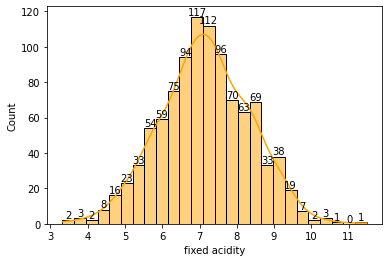

In [134]:
# FIXED ACIDITY
normalityTests("fixed acidity")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "fixed acidity" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.0288, -0.5 < -0.0288 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.0192, -0.5 < -0.0192 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "fixed acidity" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.9308 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "fixed acidity" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.8935 > 0.05).

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "fixed acidity" berdistribusi normal.

### 2. volatile acidity

Skewness        : -0.1976986986092083
Excess Kurtosis : 0.16185290336961788

D'Agustino-Pearson Test
Test            : 7.581251985533493
Nilai p         : 0.022581461594113835

Shapiro-Wilk Test
Test            : 0.997028648853302
Nilai p         : 0.05993043631315231


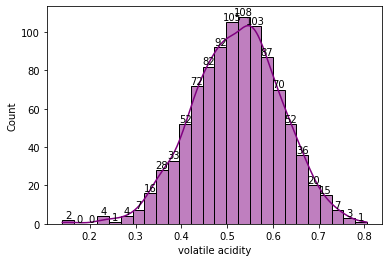

In [135]:
normalityTests("volatile acidity")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "volatile acidity" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. Walaupun begitu, sekilas histogramnya terlihat *negatively skewed*. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.1976, -0.5 < -0.1976 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = 0.1618, -0.5 < 0.1618 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "volatile acidity" tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari 0.05 (Nilai P = 0.0225 <= 0.05). 
- Berdasarkan Shapiro-Wilk Test, kolom "volatile acidity" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.0599 > 0.05).

Terdapat perbedaan hasil tes diantara D'Agustino-Pearson Test dan Shapiro-Wilk Test karena nilai P dianggap berada dalam perbatasan normalitas.

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "fixed acidity" tidak berdistribusi normal.

### 3. citric acid

Skewness        : -0.045576058685017296
Excess Kurtosis : -0.1046792495951605

D'Agustino-Pearson Test
Test            : 0.7663607229418252
Nilai p         : 0.6816899375976969

Shapiro-Wilk Test
Test            : 0.9979573488235474
Nilai p         : 0.26522907614707947


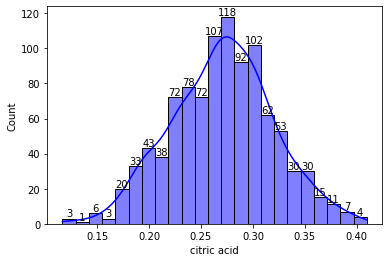

In [136]:
normalityTests("citric acid")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "citric acid" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.0455, -0.5 < -0.0455 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.1046, -0.5 < -0.1046 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "citric acid" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.6816 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "citric acid" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.2652 > 0.05).

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "citric acid" berdistribusi normal.

### 4. residual sugar

Skewness        : 0.13263808618992312
Excess Kurtosis : -0.04298003436476261

D'Agustino-Pearson Test
Test            : 2.9862716504538622
Nilai p         : 0.22466703321310558

Shapiro-Wilk Test
Test            : 0.9968547224998474
Nilai p         : 0.044918645173311234


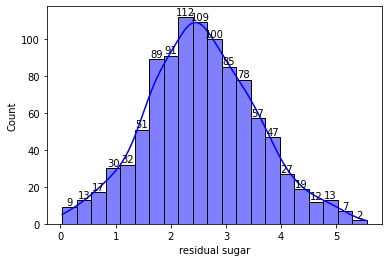

In [137]:
normalityTests("residual sugar")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "residual sugar" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = 0.1326, -0.5 < 0.1326 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.0429, -0.5 < -0.0429 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "residual sugar" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.2246 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "residual sugar" tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari 0.05 (Nilai P = 0.0449 <= 0.05).

Terdapat perbedaan hasil tes diantara D'Agustino-Pearson Test dan Shapiro-Wilk Test karena nilai P dianggap berada dalam perbatasan normalitas.


#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "residual sugar" berdistribusi normal.

### 5. chlorides

Skewness        : -0.05131929742072573
Excess Kurtosis : -0.2465081359240382

D'Agustino-Pearson Test
Test            : 3.538242355484952
Nilai p         : 0.17048274704296862

Shapiro-Wilk Test
Test            : 0.9976862072944641
Nilai p         : 0.17465530335903168


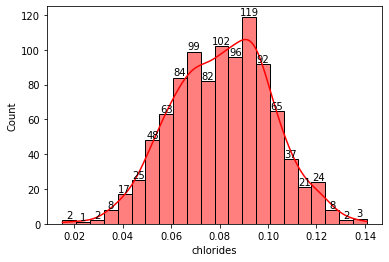

In [138]:
normalityTests("chlorides")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "chlorides" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.0513, -0.5 < -0.0513 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.2465, -0.5 < -0.2465 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "chlorides" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.1704 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "chlorides" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.1746 > 0.05).

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "chlorides" berdistribusi normal.

### 6. free sulfur dioxide

Skewness        : 0.007130415991143398
Excess Kurtosis : -0.36496364342685306

D'Agustino-Pearson Test
Test            : 8.099074980855514
Nilai p         : 0.01743043451827735

Shapiro-Wilk Test
Test            : 0.9968221783638
Nilai p         : 0.04255827143788338


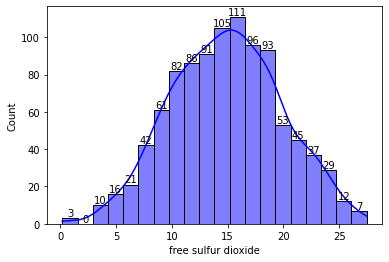

In [139]:
normalityTests("free sulfur dioxide")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "free sulfur dioxide" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = 0.0071, -0.5 < 0.0071 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.3649, -0.5 < -0.3649 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "free sulfur dioxide" tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari 0.05 (Nilai P = 0.0174 <= 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "free sulfur dioxide" tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari 0.05 (Nilai P = 0.0425 <= 0.05).

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "free sulfur dioxide" tidak berdistribusi normal.

### 7. total sulfur dioxide

Skewness        : -0.024060026812269975
Excess Kurtosis : 0.06394978916172311

D'Agustino-Pearson Test
Test            : 0.3276640291639825
Nilai p         : 0.8488846101395726

Shapiro-Wilk Test
Test            : 0.9984723925590515
Nilai p         : 0.5367269515991211


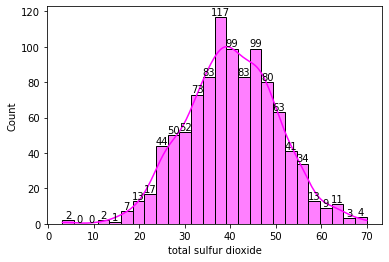

In [140]:
normalityTests("total sulfur dioxide")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "total sulfur dioxide" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.0241, -0.5 < -0.0241 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = 0.0639, -0.5 < 0.0639 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "total sulfur dioxide" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.8489 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "total sulfur dioxide" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.5367 > 0.05).
#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "total sulfur dioxide" berdistribusi normal.

### 8. density

Skewness        : -0.07688278915513917
Excess Kurtosis : 0.01636562128503849

D'Agustino-Pearson Test
Test            : 1.026581544320803
Nilai p         : 0.5985227325531981

Shapiro-Wilk Test
Test            : 0.9989627003669739
Nilai p         : 0.8533204793930054


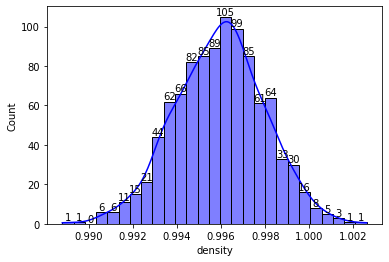

In [141]:
normalityTests("density")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "density" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.0769, -0.5 < -0.0769 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = 0.0164, -0.5 < 0.0164 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "density" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.5985 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "density" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.8533 > 0.05).
#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "density" berdistribusi normal.

### 9. pH

Skewness        : 0.14767259510827038
Excess Kurtosis : 0.0809095518741838

D'Agustino-Pearson Test
Test            : 3.9786546459928545
Nilai p         : 0.13678740824860436

Shapiro-Wilk Test
Test            : 0.997534453868866
Nilai p         : 0.13713516294956207


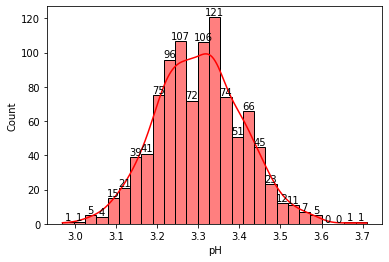

In [142]:
normalityTests("pH")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "pH" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = 0.1477, -0.5 < 0.1477 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = 0.0809, -0.5 < 0.0809 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "pH" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.1368 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "pH" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.1371 > 0.05).
#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "pH" berdistribusi normal.

### 10. sulphates

Skewness        : 0.1491989008699043
Excess Kurtosis : 0.06481928180859686

D'Agustino-Pearson Test
Test            : 3.948820277859041
Nilai p         : 0.13884318628391681

Shapiro-Wilk Test
Test            : 0.997409999370575
Nilai p         : 0.11214283108711243


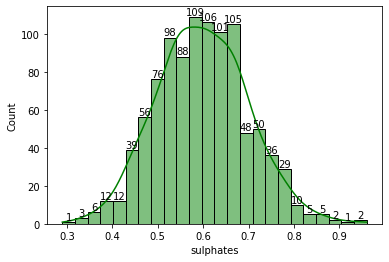

In [143]:
normalityTests("sulphates")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "sulphates" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = 0.1492, -0.5 < 0.1492 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = 0.0648, -0.5 < 0.0648 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "sulphates" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.1388 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "sulphates" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.1121 > 0.05).
#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "sulphates" berdistribusi normal.

### 11. alcohol

Skewness        : -0.01899140432111647
Excess Kurtosis : -0.13173155932281988

D'Agustino-Pearson Test
Test            : 0.7740076714171271
Nilai p         : 0.6790884901361043

Shapiro-Wilk Test
Test            : 0.9984460473060608
Nilai p         : 0.519870400428772


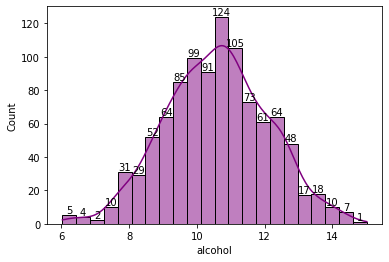

In [144]:
normalityTests("alcohol")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "alcohol" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.019, -0.5 < -0.019 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.1317, -0.5 < -0.1317 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "alcohol" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.6791 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "alcohol" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.5199 > 0.05).
#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom "alcohol" berdistribusi normal.

### 12. quality

Kolom "quality" adalah kolom yang memiliki distribusi diskrit sehingga tidak perlu dilakukan pengecekan normalitas.